<a href="https://colab.research.google.com/github/Leksuu/ilo-sona/blob/colab-shakespeare-tricks/tokiponaShakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jqhoogland/ilo-sona.git


Cloning into 'ilo-sona'...
remote: Enumerating objects: 2054, done.
remote: Counting objects: 100% (2054/2054), done.
remote: Compressing objects: 100% (1956/1956), done.
remote: Total 2054 (delta 81), reused 2026 (delta 57), pack-reused 0
Receiving objects: 100% (2054/2054), 2.85 MiB | 4.35 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [ ]:
%cd ilo-sona

/content/ilo-sona


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=879

In [ ]:
%cd ilosona

/content/ilo-sona/ilosona


In [ ]:
!git branch aleksitesting

In [ ]:
!git checkout aleksitesting

Switched to branch 'aleksitesting'


In [ ]:
#!python train.py

In [ ]:
#import sys
#sys.path.append('/content/ilo-sona')

In [ ]:
#sys.path.append('/content/ilo-sona/ilosona')

In [ ]:
#%cd /content/ilo-sona


In [ ]:
#!python ilosona/train.py

In [ ]:
#%cd /content/ilo-sona
!python3 ilosona/train.py

python3: can't open file '/content/ilo-sona/ilosona/ilosona/train.py': [Errno 2] No such file or directory


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from dataclasses import dataclass

from tqdm.auto import tqdm

from pathlib import Path

import matplotlib.pyplot as plt

torch.manual_seed(1357)

In [ ]:
%cd ilo-sona
!ls
import glob

file_paths = glob.glob('corpus/Derivative Works of (C)/Michael Freedman/LittlePrince/*.txt')

data = ""

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        data += f.read() + ' '


[Errno 2] No such file or directory: 'ilo-sona'
/content/ilo-sona
corpus	Corpus	corpus-test  ilosona  LICENSE  README.md  requirements.txt


In [ ]:
'''%cd ilo-sona
!ls
with open('corpus-test/jan lawa Oliki Soweli Elepanto.txt','r',encoding='utf-8') as f:
    data = f.read()

SyntaxError: ignored

In [ ]:
import os
print(os.getcwd())

In [ ]:
'''class CharacterLevelTokenizer:
    def __init__(self,data):
        self.data = data
        self.vocab = sorted(list(set(self.data)))
        self.VOCAB_SIZE = len(self.vocab)

        self.i_s = {i:s for i,s in enumerate(self.vocab)}
        self.s_i = {s:i for i,s in self.i_s.items()}

    def encode(self,s):
        return torch.tensor([self.s_i[c] for c in s],dtype=torch.long)

    def decode(self,s):
        return ''.join([self.i_s[i.item()] for i in s])

tokenizer = CharacterLevelTokenizer(data)'''

# Chat GPT edited
class WordLevelTokenizer:
    def __init__(self, data):
        self.data = data
        self.vocab = sorted(list(set(self.data.split())))
        self.VOCAB_SIZE = len(self.vocab)

        self.i_s = {i: s for i, s in enumerate(self.vocab)}
        self.s_i = {s: i for i, s in self.i_s.items()}

    def encode(self, s):
        return torch.tensor([self.s_i[word] for word in s.split()], dtype=torch.long)

    def decode(self, s):
        return ' '.join([self.i_s[i.item()] for i in s])

tokenizer = WordLevelTokenizer(data)


In [ ]:
@dataclass
class Config:
    block_size = 256 # context-length
    batch_size = 64 # mini-batch size
    vocab_size = tokenizer.VOCAB_SIZE
    n_embed = 256
    n_heads = 8
    head_size = n_embed // n_heads # computes to 384/6=64 or 128/4=32 or 256/8

    n_layers = 3

    train_iters = 10
    val_iters = 1
    lr = 3e-4

    attn_dropout = 0.1
    block_dropout = 0.1

    device = 'cuda' if torch.cuda.is_available() else 'cpu'

Config.device

'cpu'

In [ ]:
class FakeShakespeareDataset:
    def __init__(self,Config, is_test=False) -> None:
        self.tokenizer = WordLevelTokenizer(data)
        self.is_test = is_test
        self.full_data = self.tokenizer.encode(self.tokenizer.data)
        if self.is_test:
            self.data = self.full_data[int(0.9*len(self.full_data)):]
        else:
            self.data = self.full_data[:int(0.9*len(self.full_data))]
        self.block_size = Config.block_size
        self.batch_size = Config.batch_size

    def __len__(self) -> int:
        return len(self.data)

    def get_block_size(self) -> int:
        return self.block_size

    def get_vocab_size(self) -> int:
        print(self.tokenizer.VOCAB_SIZE, "thats the vocab size")
        return self.tokenizer.VOCAB_SIZE

    def get(self):
        ix = torch.randint(len(self.data) - self.block_size, (self.batch_size,))
        x = torch.stack([self.data[i:i+self.block_size] for i in ix])
        y = torch.stack([self.data[i+1:i+self.block_size+1] for i in ix])
        return x,y

In [ ]:
class AttentionHead(nn.Module):
    def __init__(self, Config):
        super().__init__()

        self.block_size = Config.block_size
        self.n_embed = Config.n_embed
        self.head_size = Config.head_size

        self.key = nn.Linear(self.n_embed, self.head_size, bias=False)
        self.query = nn.Linear(self.n_embed, self.head_size, bias=False)

        self.value = nn.Linear(self.n_embed, self.head_size, bias=False)

        self.register_buffer(
            'tril',
            torch.tril(torch.ones(self.block_size,self.block_size))
        )

        self.dropout = nn.Dropout(Config.attn_dropout)

    def forward(self, x):

        B,T,C = x.shape

        k = self.key(x)
        q = self.query(x)

        wei = q@k.transpose(-2,-1) * (C ** 0.5)
        wei = wei.masked_fill(self.tril[:T,:T]==0,float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)

        v = self.value(x)
        out = wei @ v

        return out

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, Config):
        super().__init__()
        self.n_heads = Config.n_heads
        self.head_size = Config.head_size

        self.heads = nn.ModuleList([AttentionHead(Config) for _ in range(self.n_heads)])

        self.projection = nn.Linear(Config.n_embed, Config.n_embed)

        self.dropout = nn.Dropout(Config.attn_dropout)

    def forward(self,x):
        x = torch.cat([h(x) for h in self.heads],dim=-1)
        x = self.projection(x)
        x = self.dropout(x)
        return x

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, Config):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(Config.n_embed,Config.n_embed * 4),
            nn.ReLU(),
            nn.Linear(Config.n_embed * 4, Config.n_embed), # projection
            nn.Dropout(Config.block_dropout)
        )
    def forward(self,x):
        return self.net(x)

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, Config):
        super().__init__()
        self.attn = MultiHeadAttention(Config)
        self.ff = FeedForward(Config)
        self.ln1 = nn.LayerNorm(Config.n_embed)
        self.ln2 = nn.LayerNorm(Config.n_embed)

    def forward(self,x):
        x = x + self.attn(self.ln1(x))
        x = x + self.ff(self.ln2(x))

        return x

In [ ]:
class FakeShakespeareGPT(nn.Module):
    def __init__(self,Config):
        super().__init__()

        self.n_embed = Config.n_embed
        self.block_size = Config.block_size

        self.token_embedding_table = nn.Embedding(Config.vocab_size,self.n_embed)
        self.pos_embedding_table = nn.Embedding(self.block_size, self.n_embed)

        self.blocks = nn.Sequential(
            *[TransformerBlock(Config)]*Config.n_layers,
            nn.LayerNorm(self.n_embed)
        )

        self.lm_head = nn.Linear(self.n_embed,Config.vocab_size)

    def forward(self,idx):

        B,T = idx.shape

        token_embs = self.token_embedding_table(idx)
        pos_embs = self.pos_embedding_table(torch.arange(T,device=Config.device))


        x = token_embs + pos_embs
        x = self.blocks(x)
        logits = self.lm_head(x)

        return logits


    def generate(self,idx,total):
        for _ in range(total):
            idx_cond = idx[:, -self.block_size:]
            logits= self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

In [ ]:
train_ds = FakeShakespeareDataset(Config)
val_ds = FakeShakespeareDataset(Config,is_test=True)

In [ ]:
lm = FakeShakespeareGPT(Config)
lm = lm.to(device=Config.device)

In [ ]:
optim = torch.optim.AdamW(lm.parameters(), lr=Config.lr)


In [ ]:
def loss_fn(logits, targets):
    B,T,C = logits.shape
    logits = logits.view(B*T, C)
    targets = targets.view(B*T)
    loss = F.cross_entropy(logits,targets)
    return loss

In [ ]:
def train_N_iters():
    lm.train()
    train_step_losses = []
    for batch in tqdm(range(Config.train_iters)):
        optim.zero_grad()
        inputs, targets = train_ds.get()
        inputs, targets = inputs.to(device=Config.device), targets.to(device=Config.device)
        logits = lm(inputs)
        loss = loss_fn(logits,targets)
        loss.backward()
        optim.step()
        train_step_losses.append(loss.item())

        if batch%(Config.train_iters//10)==0 or batch==Config.train_iters-1:
            print(f"batch {batch} train step loss: {loss.item()}")

        del inputs, targets, loss, logits

    return train_step_losses

@torch.no_grad()
def valid_N_iters():
    lm.eval()
    val_step_losses = []
    for batch in tqdm(range(Config.val_iters)):
        inputs, targets = val_ds.get()
        inputs, targets = inputs.to(device=Config.device), targets.to(device=Config.device)
        logits = lm(inputs)
        loss = loss_fn(logits,targets)
        val_step_losses.append(loss.item())

        #if batch%(Config.val_iters//10)==0 or batch==Config.val_iters-1:
        #    print(f"batch {batch} valid step loss: {loss.item()}")

        del inputs, targets, loss, logits

    return val_step_losses


In [ ]:
def save_lm():
    state_dict = lm.state_dict()
    save_path = Path('./').resolve() / 'fakeshakespeareGPT'
    save_path.mkdir(exist_ok=True)
    model_path = save_path / f'fakeshakespeareGPT.pth'
    torch.save(state_dict, model_path)

In [ ]:
def train_lm():
    train_losses = train_N_iters()
    valid_losses = valid_N_iters()
    save_lm()
    return train_losses, valid_losses

In [ ]:
tl,vl=train_lm()

  0%|          | 0/10 [00:00<?, ?it/s]

batch 0 train step loss: 6.5989251136779785
batch 1 train step loss: 6.392740249633789
batch 2 train step loss: 6.1711273193359375
batch 3 train step loss: 5.979978084564209
batch 4 train step loss: 5.801365375518799
batch 5 train step loss: 5.652804851531982
batch 6 train step loss: 5.520809173583984
batch 7 train step loss: 5.422130107879639
batch 8 train step loss: 5.287404537200928
batch 9 train step loss: 5.2230634689331055


  0%|          | 0/1 [00:00<?, ?it/s]

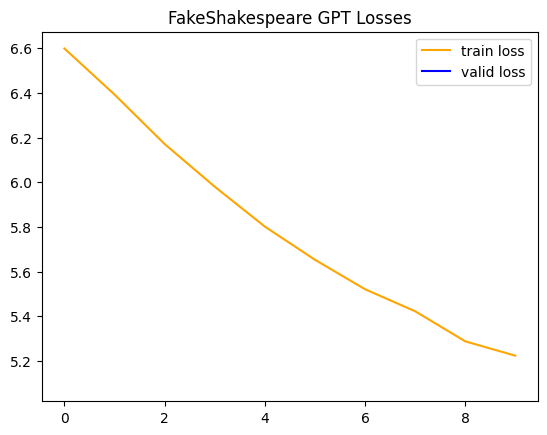

In [ ]:
plt.plot(tl,label='train loss',color='orange')
plt.plot(vl,label='valid loss',color='blue')
plt.title('FakeShakespeare GPT Losses')
plt.legend()
plt.show()

In [ ]:
testtokenize = tokenizer.encode("seme")
print(testtokenize.shape)
ids = testtokenize.view(1,-1)
ids.shape

torch.Size([1])


torch.Size([1, 1])

In [ ]:
torch.zeros((1,1),dtype=torch.long,device=Config.device).shape

torch.Size([1, 1])

In [ ]:
generated_texts = []
for length in [100,300,500,700,1000]:
    generated = lm.generate(
    ids, # initial context 0
    total=length
)
    generated = tokenizer.decode(generated[0])
    text=f'generated ({length} tokens)\n{"="*50}\n{generated}\n{"="*50}\n\n'
    generated_texts.append(text)
    print(text)

generated (100 tokens)
seme wan. pi poki. e 3251? 'toki!' tenpo.' olin li suno: 'pilin ante.' pilin kin tu!' loje: poki ijo?' musi! tomo-tawa-linja jan.' ma.' linja: kin mute mi! lape.' li pakala moli lon, telo (mi sike. ona?' sike 'a?' loje?? wan li 'soweli wawa. 'ken ma. seme?!' la laso.' li jo toki! li moku jelo. kalama ona ijo!' ni esun poka. oko!' o, pali li Ilopa! nanpa! musi: seme?! li jo sina.' 11. wawa. ona? li loje! suli.) 'pona! telo?' li kasi.' tomo-tawa-kon! laso.' 28. ona ona. li nena?' ali palisa sitelen. seme?' li mute nimi 'kalama li ijo?' pakala sewi. nasa!


generated (300 tokens)
seme jo kin loje, tu!' e 'lipu loje li tu!' pilin wawa.' palisa 11. kasi. lipu. ''pali loje?? lon! nanpa! monsi lukin. weka.' toki: ante. sina; musi. tawa! wan! Ilopa! noka lawa.' moli!'. e suno pimeja suli.) e ni!' laso Masu. 'ali nanpa seli 'tawa 'pali awen. taso, 'wawa.' waso''. ijo.' seli!' li 24. ala?' ni: lili mi jan jan-tawa.' telo?' lon! kasi lili jo sina!' 'wawa.' meli.' 'ala. ante

In [ ]:
!git